<h3>Machine Learning</h3>
<p>The predictive model that answers questions about the level of diabetes progression after one year,.you will have to predict the level of disease progression after one year, from 10 variables measured on patients.</p>

In [78]:
#import libraries
from sklearn import datasets
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#load the diabetes dataset
diabetes_df = datasets.load_diabetes(as_frame=True)
df = diabetes_df.frame

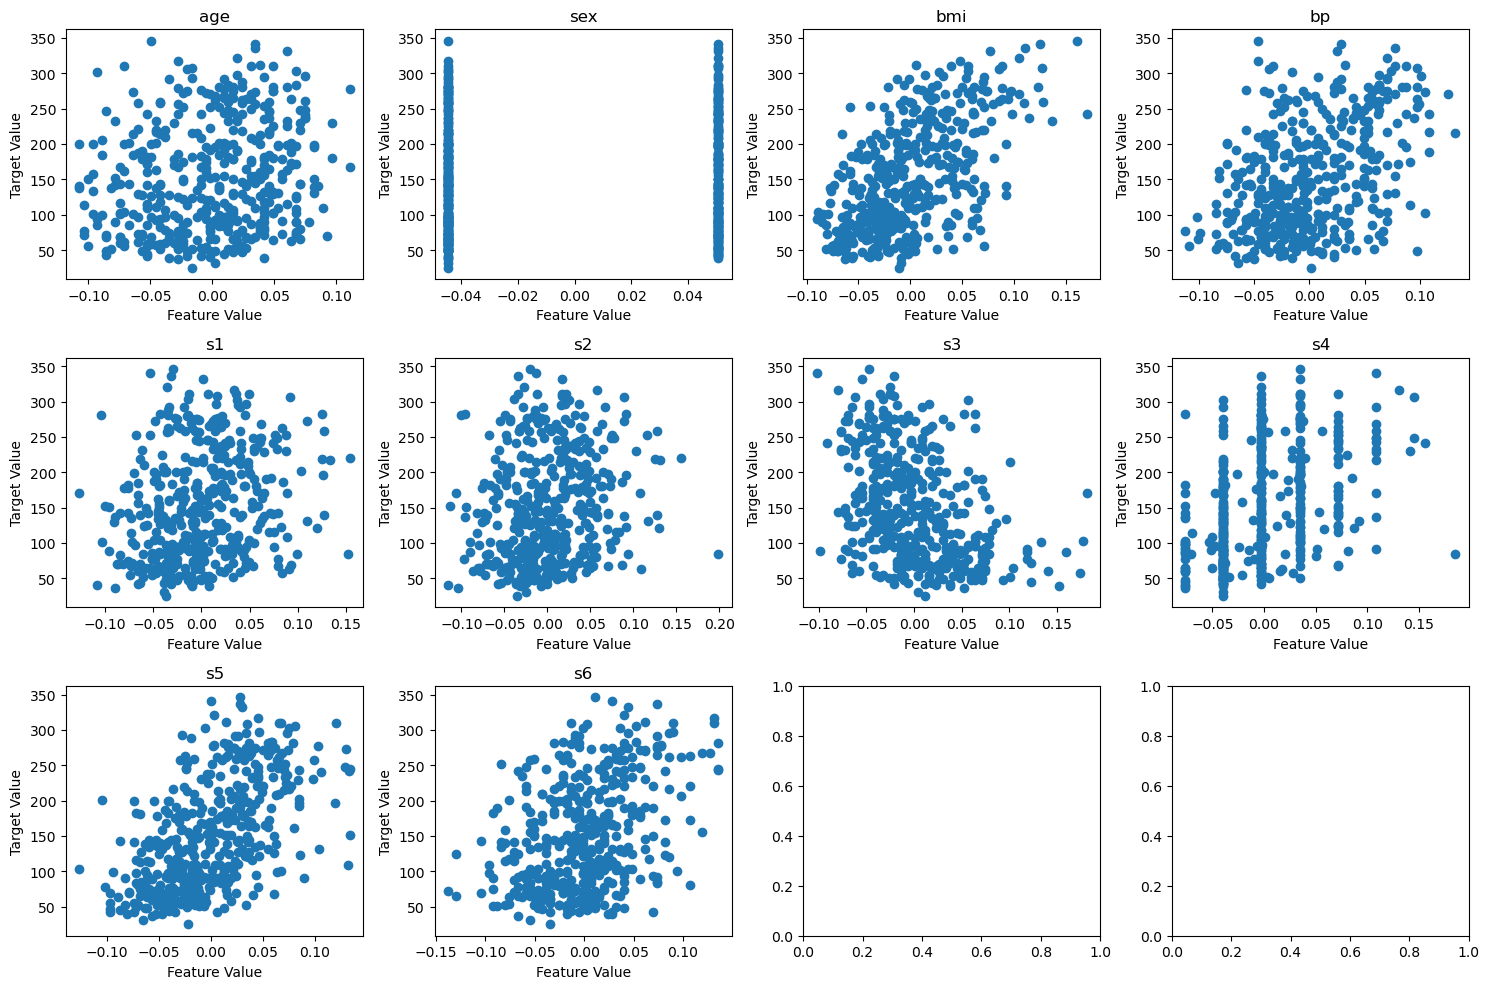

In [80]:
#create grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

#flattens the axis array to facilitate iteration
axes = axes.flatten()

#plot each feature against the target variable
for i, (f_name, ax) in enumerate(zip(df.columns[:-1], axes)):
    ax.scatter(df[f_name], df['target'])
    #title plot
    ax.set_title(f_name)
    #x axis name
    ax.set_xlabel('Feature Value')
    #y axis name
    ax.set_ylabel('Target Value')

#adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [81]:
diabetes = datasets.load_diabetes()
x = diabetes['data']
y = diabetes['target']

#define two different sets: traning set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
clf = Ridge()
clf.fit(X_train, y_train)
print(f"Train Score: {clf.score(X_train, y_train)}")
print(f"Test Score: {clf.score(X_test, y_test)}")

Train Score: 0.42730211000433205
Test Score: 0.43840029731424435


<p>With a single train-test split, the performance of the model can vary significantly depending on which data points end up in the training set and which end up in the test set. Cross-validation mitigates this variability by averaging the model's performance over multiple train-test splits. While a single train-test split can give a quick estimate of model performance, cross-validation offers a more reliable and comprehensive evaluation, making it the preferred method for assessing model generalization.

Cross-validation allows us to use all available data for both training and testing, thereby maximizing the use of the dataset. In contrast, a single train-test split reserves a portion of the data exclusively for testing, potentially leading to less efficient use of the available samples.</p>

<h4>Model Selection via Validation</h4>

In [82]:
diabetes = datasets.load_diabetes()
x = diabetes['data']
y = diabetes['target']

In [83]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [84]:
#k-fold cross-validator - cross Validation with the default hyper-parameters
fold = 0
scores = []
for train_idx, test_idx in kf.split(x, y):
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test= x[test_idx], y[test_idx]
    clf = Ridge()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    scores.append(score)
    fold += 1
    print(f">>>>>>>>>>>> Fold N°: {fold}>>>>>>>>>>>>")
    print(f"Score: {score}")
mean = np.mean(scores)
std = np.std(scores)
print(f"Mean of the scores: {mean}\nStandard deviation: {std}")   

>>>>>>>>>>>> Fold N°: 1>>>>>>>>>>>>
Score: 0.41915292635986545
>>>>>>>>>>>> Fold N°: 2>>>>>>>>>>>>
Score: 0.4520132254526975
>>>>>>>>>>>> Fold N°: 3>>>>>>>>>>>>
Score: 0.33243928428186476
>>>>>>>>>>>> Fold N°: 4>>>>>>>>>>>>
Score: 0.5004555768162948
>>>>>>>>>>>> Fold N°: 5>>>>>>>>>>>>
Score: 0.3424397411534186
Mean of the scores: 0.40930015081282817
Standard deviation: 0.06420078318020657


In [85]:
diabetes = datasets.load_diabetes()
x = diabetes['data']
y = diabetes['target']

In [86]:
#cross_val_score - cross Validation with the default hyper-parameters
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Ridge(), x, y, cv=cv, scoring='r2') 
print(f"Ridge cross_val_score: {scores}")
mean = np.mean(scores)
std = np.std(scores)
print(f"Mean of the scores: {mean}\nStandard deviation: {std}")  

Ridge cross_val_score: [0.41915293 0.45201323 0.33243928 0.50045558 0.34243974]
Mean of the scores: 0.40930015081282817
Standard deviation: 0.06420078318020657


<h4>Hyperparameter optimization with cross-validation</h4>
<p>Hyperparameters are the parameters set when you instantiate the classifier. Ridge Regression uses l2 regularization. Choosing the regularization parameter is important becuse you can control the complexity of a model. Regularization restrict a model to avoid overfitting. Ridge model makes a trade-off between the simplicity of the model and its performance on the training set.</p>

In [87]:
diabetes = datasets.load_diabetes()
x = diabetes['data']
y = diabetes['target']
x, y = shuffle(x, y, random_state=123)
X_tr, X_val, X_test = x[:250], x[250:300], x[300:]
y_tr, y_val, y_test = y[:250], y[250:300], y[300:]

In [88]:
X_tr.shape, X_val.shape, X_test.shape

((250, 10), (50, 10), (142, 10))

<p>Using np.logspace(-3, 0, 30) to generate a range of alpha values is a reasonable choice, as it allows to explore a broad range of regularization strengths in a logarithmic scale. It generates values that span several orders of magnitude (from 0.001 to 1) in a logarithmic scale. This allows you to explore both small and large alpha values effectively.
<br>
<b>In this analysis, 40 numbers ranging from 10^-3 (0.001) up to 10^0 (1)</b></p>

Text(0.5, 1.0, 'Alpha range to try')

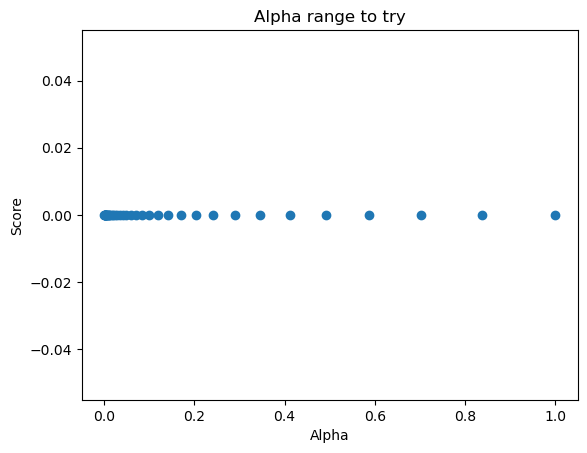

In [89]:
#creating the alphas to try in the model
alphas = np.logspace(-3, 0, 40)
y = np.zeros(40)
plt.plot(alphas, y, 'o')
plt.ylabel('Score')
plt.xlabel('Alpha')
plt.title('Alpha range to try')

In [90]:
#Manual Hyperparameter optimization - phase: which value for the hyperparameters gives the best results
clf = Ridge()
scores = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_tr, y_tr)
    clf.predict(X_val)
    score = clf.score(X_val, y_val)
    print("Alpha: {:.4f}, Score: {:.4f}".format(alpha, score))
    scores.append(score)
max_score = np.max(scores)
best_alpha = alphas[scores.index(max_score)]
print("Best score: {:.4f}, Best alpha: {:.4f}".format(max_score, best_alpha))

Alpha: 0.0010, Score: 0.4432
Alpha: 0.0012, Score: 0.4431
Alpha: 0.0014, Score: 0.4429
Alpha: 0.0017, Score: 0.4427
Alpha: 0.0020, Score: 0.4426
Alpha: 0.0024, Score: 0.4424
Alpha: 0.0029, Score: 0.4423
Alpha: 0.0035, Score: 0.4422
Alpha: 0.0041, Score: 0.4421
Alpha: 0.0049, Score: 0.4421
Alpha: 0.0059, Score: 0.4422
Alpha: 0.0070, Score: 0.4423
Alpha: 0.0084, Score: 0.4426
Alpha: 0.0100, Score: 0.4430
Alpha: 0.0119, Score: 0.4436
Alpha: 0.0143, Score: 0.4443
Alpha: 0.0170, Score: 0.4453
Alpha: 0.0203, Score: 0.4465
Alpha: 0.0242, Score: 0.4479
Alpha: 0.0289, Score: 0.4496
Alpha: 0.0346, Score: 0.4516
Alpha: 0.0412, Score: 0.4538
Alpha: 0.0492, Score: 0.4564
Alpha: 0.0588, Score: 0.4592
Alpha: 0.0702, Score: 0.4623
Alpha: 0.0838, Score: 0.4655
Alpha: 0.1000, Score: 0.4688
Alpha: 0.1194, Score: 0.4722
Alpha: 0.1425, Score: 0.4753
Alpha: 0.1701, Score: 0.4782
Alpha: 0.2031, Score: 0.4805
Alpha: 0.2424, Score: 0.4821
Alpha: 0.2894, Score: 0.4827
Alpha: 0.3455, Score: 0.4821
Alpha: 0.4125,

In [91]:
clf = Ridge(alpha=best_alpha)
clf.fit(X_tr, y_tr)
clf.predict(X_test)
clf.score(X_test, y_test)

0.4670932387523318

Text(0, 0.5, 'Cross-alidation Scores')

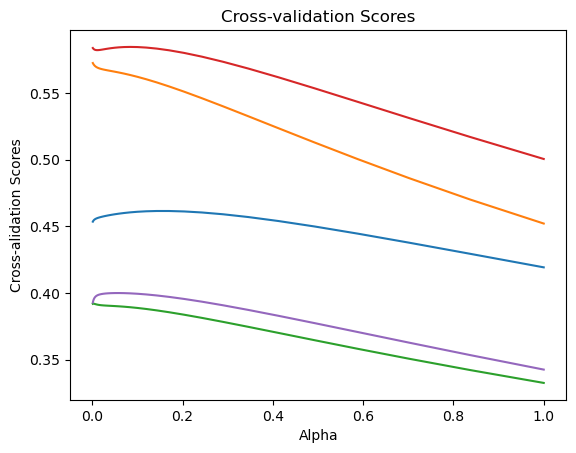

In [92]:
#cross-validation score as a function of alpha
diabetes = datasets.load_diabetes()
x = diabetes['data']
y = diabetes['target']
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = [cross_val_score(Ridge(alpha), x, y, cv=cv) for alpha in alphas]
plt.plot(alphas, scores, label='Ridge')
plt.title('Cross-validation Scores')
plt.xlabel('Alpha')
plt.ylabel('Cross-alidation Scores')

In [93]:
#Hyperparameter optimization - phase: Performing Grid Search
x = diabetes['data']
y = diabetes['target']
alphas = np.logspace(-3, 0, 40)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
clf = Ridge()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
gscv = GridSearchCV(clf, dict(alpha=alphas), cv=cv)

In [94]:
gscv.fit(X_train, y_train)
gscv.predict(X_test)
score = gscv.score(X_test, y_test)
print("Ridge: {}\nScore: {}".format(gscv.best_params_, score))

Ridge: {'alpha': 0.003455107294592218}
Score: 0.4861795707196399


<p>The first method I manually iterate over a range of alpha values and select the one that gives the best performance on the validation set. This selection process might not always result in the optimal hyperparameter value. The second method - Grid Search with Cross-Validation - exhaustively searches through all combinations of hyperparameters and selects the one that maximizes the cross-validated performance, leading to a more systematic and potentially better hyperparameter selection.</p>

In [95]:
# Hyperparameter optimization- Built-in Hyperparameter Search with RidgeCV
x = diabetes['data']
y = diabetes['target']
alphas = np.logspace(-3, 0, 40)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = RidgeCV(alphas=alphas, cv=cv)

In [96]:
model.fit(X_train, y_train)
model.predict(X_test)
score = model.score(X_test, y_test)
print('RidgeCV alphas: {}\nScore: {}'.format(model.alpha_, score))

RidgeCV alphas: 0.003455107294592218
Score: 0.4861795707196399


<h4>Nested Cross validation</h4>
<p>When the same cross-validation procedure and the same data set are used for both tuning and model selection, it is likely to result in an optimistically biased assessment of model performance.</p> 
<p>One approach to overcome this bias is to nest the hyper-parameter optimisation procedure underneath the model selection procedure.</p>
<p>This procedure is called <i>double cross-validation</i> or nested cross-validation and is the preferred method for evaluating and comparing tuned machine learning models. <i>This approach ensures that model performance is evaluated on unseen data in a robust and unbiased manner, effectively solving the problem of overfitting when adjusting hyperparameters.</i></p>

In [97]:
x = diabetes['data']
y = diabetes['target']
alphas = np.logspace(-3, 0, 40)

In [98]:
x = diabetes['data']
y = diabetes['target']
alphas = np.logspace(-3, 0, 40)

#outer cross-validation
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

for train_idx, test_idx in cv_outer.split(x, y):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    #inner cross-validation for hyperparameter tuning - phase: train dataset defined by the outer loop is 
    #inner loop dataset
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
    model = RidgeCV(alphas=alphas, cv=cv_inner)
    model.fit(X_train, y_train)

# The data was used to set the hyperparameters, then test on new data
# evaluate the model on the test set
#phase: create predictions on the pending data from the external loop and estimate the performance of the model
    score = model.score(X_test, y_test)
    print("Score: {}, Alpha: {}".format(score, model.alpha_))
    outer_scores.append(score)

Score: 0.4604083238705088, Alpha: 0.0837677640068292
Score: 0.5659674341902783, Alpha: 0.04923882631706741
Score: 0.3886838814972211, Alpha: 0.1
Score: 0.5835878952508373, Alpha: 0.04124626382901352
Score: 0.3927661504165699, Alpha: 0.001


In [99]:
#average performance across outer folds - phase: summarise estimated model performance
nested_cv_score = np.mean(outer_scores)
std = np.std(outer_scores)
print("Nested Cross-Validation Score: {} ({:.3f})".format(nested_cv_score, std))

Nested Cross-Validation Score: 0.4782827370450831 (0.083)


In [100]:
#simple way that we can perform the same procedure 
x = diabetes['data']
y = diabetes['target']
alphas = np.logspace(-3, 0, 40)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = RidgeCV(alphas=alphas, cv=cv)
scores = cross_val_score(model, x, y, cv=cv)

print("Nested Cross-Validation Score: {} ({:.3f})".format(np.mean(scores), np.std(scores)))

Nested Cross-Validation Score: 0.4782827370450831 (0.083)


<h4>Conclusion</h4>
<p>
    <ul>
         <li>The baseline performance of the Ridge regression model with default hyperparameters yields a mean R^2 score of approximately 0.409, with a standard deviation of 0.064. This indicates that the model explains around 40.9% of the variance in the target variable on average across different folds.</li>
          <li>After performing hyperparameter optimization using GridSearchCV, the best alpha value found is approximately 0.00345. With this tuned parameter, the model achieves an improved R^2 score of approximately 0.486. This suggests that tuning the hyperparameters leads to better model performance compared to the default setting.</li>
          <li>The nested cross-validation approach provides an average R^2 score of approximately 0.478, with a standard deviation of 0.083. This score is obtained after optimizing hyperparameters within each fold using GridSearchCV. The performance is slightly lower than the GridSearchCV result but still higher than the default setting, indicating consistency in model performance across different cross-validation folds.</li>
    </ul>
</p>